In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
from datetime import datetime
import cv2
from PIL import Image

**Mount at Drive**

In [ ]:
import zipfile
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Extract Dataset**

In [ ]:
import os
# Define the paths to your zip files
children_supplement_dataset = "/content/drive/MyDrive/Student/Ovi/Data_Set/Children's Dental/Children_s teeth - supplement.zip"
children_dental_dataset = '/content/drive/MyDrive/Student/Ovi/Data_Set/Children\'s Dental/Children\'s dental caries segmentation dataset.zip'

os.system(f'unzip "{children_supplement_dataset}" -d /content/Child_Supplement')
os.system(f'unzip "{children_dental_dataset}" -d /content/Children_Dental')


0

**Preprocess And Combining Images**

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
def load_and_preprocess_images(image_dir, mask_dir, img_size=(256, 256)):
    images = []
    masks = []
    image_filenames = sorted(os.listdir(image_dir))
    mask_filenames = sorted(os.listdir(mask_dir))

    for img_file, mask_file in zip(image_filenames, mask_filenames):
        # Load the image and mask
        img_path = os.path.join(image_dir, img_file)
        mask_path = os.path.join(mask_dir, mask_file)

        image = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Resize to the desired size (256x256)
        image = cv2.resize(image, img_size)
        mask = cv2.resize(mask, img_size)

        # Normalize image pixel values to [0, 1] range
        image = image.astype(np.float32) / 255.0
        mask = mask.astype(np.float32) / 255.0

        # Append the processed image and mask to the list
        images.append(img_to_array(image))
        masks.append(img_to_array(mask))

    return np.array(images), np.array(masks)

# Paths to your datasets
supplement_images_path = "/content/Children_Dental/Children's dental caries segmentation dataset/Supplemental content-93/images"
supplement_masks_path = "/content/Children_Dental/Children's dental caries segmentation dataset/Supplemental content-93/mask"

children_supplement_images_path = "/content/Child_Supplement/Children_s teeth - supplement/新数据集/img"
children_supplement_masks_path = "/content/Child_Supplement/Children_s teeth - supplement/新数据集/mask"

children_images_path = "/content/Children_Dental/Children's dental caries segmentation dataset/Train/images"
children_masks_path = "/content/Children_Dental/Children's dental caries segmentation dataset/Train/mask"

children_test_images_path = "/content/Children_Dental/Children's dental caries segmentation dataset/Test/images"
children_test_masks_path = "/content/Children_Dental/Children's dental caries segmentation dataset/Test/mask"

# Process each dataset
child_supp_images,child_supp_masks = load_and_preprocess_images(children_supplement_images_path, children_supplement_masks_path)
supp_images, supp_masks = load_and_preprocess_images(supplement_images_path, supplement_masks_path)
train_images, train_masks = load_and_preprocess_images(children_images_path, children_masks_path)
test_images, test_masks = load_and_preprocess_images(children_test_images_path, children_test_masks_path)

# Combine the datasets
combined_images = np.concatenate([supp_images, train_images, test_images,child_supp_images], axis=0)
combined_masks = np.concatenate([supp_masks, train_masks, test_masks,child_supp_masks], axis=0)

print(f"Combined images shape: {combined_images.shape}")
print(f"Combined masks shape: {combined_masks.shape}")


Combined images shape: (323, 256, 256, 3)
Combined masks shape: (323, 256, 256, 1)


## Combine

combining adult and child training dataset

In [ ]:
import os
X_test_location=[]
Y_test_location=[]
# Define the base path
base_path = "/content/Children_Dental/Children's dental caries segmentation dataset/Test"

# Define the paths for the images and masks directories
images_path = os.path.join(base_path, 'images')
masks_path = os.path.join(base_path, 'mask')

# List all the file names in the images and masks directories
image_files = os.listdir(images_path)
mask_files = os.listdir(masks_path)

# Display the file names
print("Image Files:")
for filename in image_files:
    X_test_location.append(os.path.join(images_path, filename))
    #print(filename)

print("\nMask Files:")
for filename in mask_files:
    Y_test_location.append(os.path.join(masks_path, filename))
    #print(filename)

Image Files:

Mask Files:


In [ ]:
import os
X_train_location=[]
Y_train_location=[]
# Define the base path
base_path = "/content/Children_Dental/Children's dental caries segmentation dataset/Train"

# Define the paths for the images and masks directories
images_path = os.path.join(base_path, 'images')
masks_path = os.path.join(base_path, 'mask')

# List all the file names in the images and masks directories
image_files = os.listdir(images_path)
mask_files = os.listdir(masks_path)

# Display the file names
print("Image Files:")
for filename in image_files:
    X_train_location.append(os.path.join(images_path, filename))
    #print(filename)

print("\nMask Files:")
for filename in mask_files:
    Y_train_location.append(os.path.join(masks_path, filename))
    #print(filename)



Image Files:

Mask Files:


X_train shape: (323, 256, 256, 3)
X_test shape: (30, 256, 256, 3)


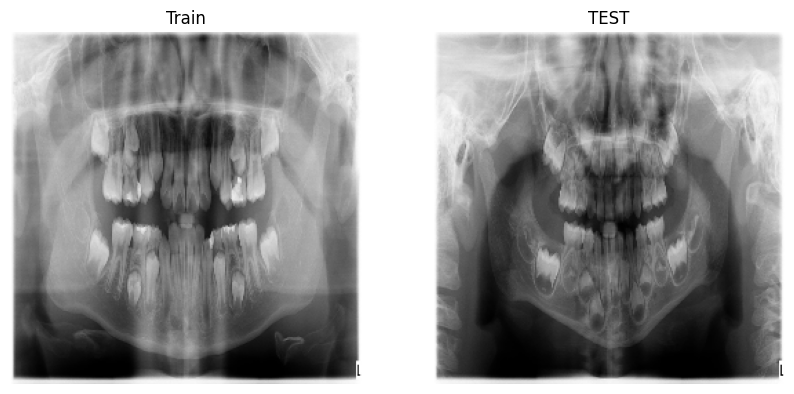

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_preprocess_images(image_paths, target_size=(256,256)):
    images = []

    for image_path in image_paths:
        # Load the image
        image = load_img(image_path, target_size=target_size)

        # Convert image to array (float type by default)
        image_array = img_to_array(image)

        # Normalize the image
        image_array = image_array / 255.0

        # Append to list
        images.append(image_array)

    images = np.array(images)
    return images

# Load and preprocess images
X_train = combined_images
X_test = load_and_preprocess_images(X_test_location)
# Verify the shape of the dataset
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(X_train[10])
axes[0].set_title('Train')
axes[0].axis('off')

axes[1].imshow(X_test[10])
axes[1].set_title('TEST')
axes[1].axis('off')

plt.show()

Y_train shape: (323, 256, 256, 1)
Y_test shape: (30, 256, 256, 1)


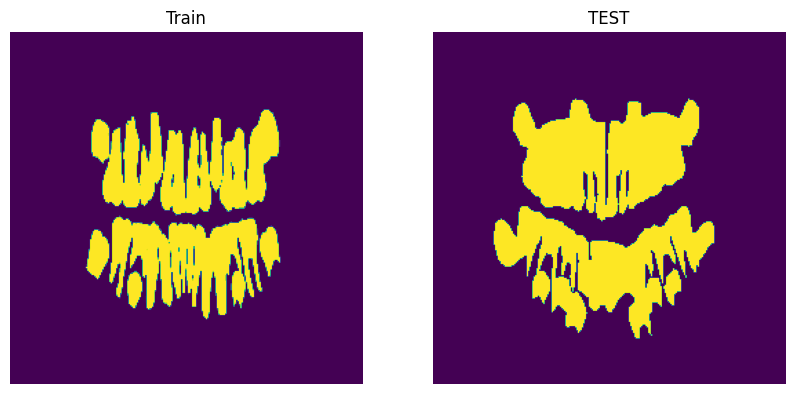

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_preprocess_images(image_paths, target_size=(256, 256)):
    images = []

    for image_path in image_paths:
        # Load the image
        image = load_img(image_path, target_size=target_size, color_mode="grayscale")

        # Convert image to array (float type by default)
        image_array = img_to_array(image)

        # Normalize the image
        image_array = image_array / 255.0

        # Append to list
        images.append(image_array)

    # Convert list to numpy array
    images = np.array(images)

    return images

# Load and preprocess images
Y_train = combined_masks
Y_test = load_and_preprocess_images(Y_test_location)
# Verify the shape of the dataset
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(np.squeeze(Y_train[10]))
axes[0].set_title('Train')
axes[0].axis('off')

axes[1].imshow(Y_test[10])
axes[1].set_title('TEST')
axes[1].axis('off')

plt.show()

In [ ]:
Y_train[Y_train > 0] = 1
Y_test[Y_test > 0] = 1
# Verify the change
print(np.unique(Y_test))  # This should print only 0 and 1

[0. 1.]


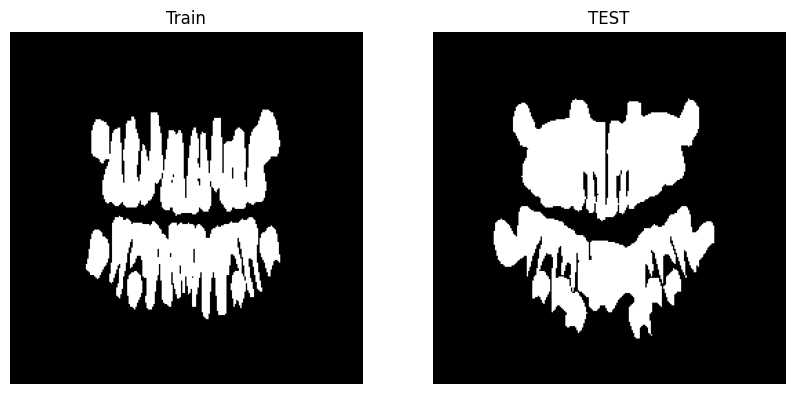

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(Y_train[10],cmap='gray')
axes[0].set_title('Train')
axes[0].axis('off')

axes[1].imshow(Y_test[10],cmap='gray')
axes[1].set_title('TEST')
axes[1].axis('off')

plt.show()

**Performance Metrics**

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def recall(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    recall_value = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall_value

def precision(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    precision_value = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision_value

def specificity(y_true, y_pred):
    true_negatives = tf.reduce_sum(tf.round(tf.clip_by_value((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = tf.reduce_sum(tf.round(tf.clip_by_value(1 - y_true, 0, 1)))
    specificity_value = true_negatives / (possible_negatives + tf.keras.backend.epsilon())
    return specificity_value

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    f1_value = 2 * (prec * rec) / (prec + rec + tf.keras.backend.epsilon())
    return f1_value

def jaccard_index(y_true, y_pred, threshold=0.5):
    # Apply threshold to predictions
    y_pred = tf.cast(y_pred > threshold, tf.float32)

    # Flatten the tensors
    y_true_f = tf.reshape(y_true, (-1,))
    y_pred_f = tf.reshape(y_pred, (-1,))

    # Calculate intersection and union
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    sum_ = tf.reduce_sum(y_true_f + y_pred_f)

    # Compute the Jaccard index (IoU)
    jaccard_value = intersection / (sum_ - intersection + tf.keras.backend.epsilon())

    return jaccard_value

def mae(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred))

import tensorflow as tf

def mean_iou(y_true, y_pred, threshold=0.5):
    y_pred = tf.cast(y_pred > threshold, tf.float32)
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])

    # Calculate intersection and union
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    total = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f)
    union = total - intersection

    # Calculate IoU
    iou = intersection / (union + tf.keras.backend.epsilon())
    return iou


def dice_coeff(y_true, y_pred, smooth=1e-6):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    union = tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f)
    return (2. * intersection + smooth) / (union + smooth)

def dice_loss(y_true, y_pred, smooth=1e-6):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    union = tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f)
    return 1 - (2. * intersection + smooth) / (union + smooth)


**SegUnet Model with VGG16 Backbone**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, concatenate, BatchNormalization, Dropout
from tensorflow.keras.models import Model

def segunet_vgg19(input_shape=(256, 256, 3), n_classes=1):
    # VGG19 backbone (encoder)
    vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

    # Extract specific layers for skip connections
    block1_conv2 = vgg19.get_layer("block1_conv2").output   # 512x512
    block2_conv2 = vgg19.get_layer("block2_conv2").output   # 256x256
    block3_conv4 = vgg19.get_layer("block3_conv4").output   # 128x128
    block4_conv4 = vgg19.get_layer("block4_conv4").output   # 64x64
    block5_conv4 = vgg19.get_layer("block5_conv4").output   # 32x32

    encoder = Model(inputs=vgg19.input, outputs=block5_conv4)

    # Decoder (Upsampling with skip connections)
    # Block 5 -> Block 4 (32x32 -> 64x64)
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(block5_conv4)
    merge6 = concatenate([up6, block4_conv4], axis=-1)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(merge6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Dropout(0.5)(conv6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)

    # Block 4 -> Block 3 (64x64 -> 128x128)
    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    merge7 = concatenate([up7, block3_conv4], axis=-1)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(merge7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Dropout(0.5)(conv7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)

    # Block 3 -> Block 2 (128x128 -> 256x256)
    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    merge8 = concatenate([up8, block2_conv2], axis=-1)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(merge8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Dropout(0.5)(conv8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)

    # Block 2 -> Block 1 (256x256 -> 512x512)
    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    merge9 = concatenate([up9, block1_conv2], axis=-1)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Dropout(0.5)(conv9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)

    # Final layer (512x512 -> output)
    conv10 = Conv2D(n_classes, (1, 1), activation='sigmoid')(conv9)  # Use 'softmax' for multi-class

    # Model
    model = Model(inputs=vgg19.input, outputs=conv10)

    return model

# Example usage
input_shape = (256, 256, 3)
n_classes = 1
model = segunet_vgg19(input_shape=input_shape, n_classes=n_classes)

# Summary of the model
model.summary()


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 256, 256, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 256, 256, 64)   │         36,928 │ block1_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 128, 128, 64)   │              0 │ block1_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv1 (Conv2D)     │ (None, 128, 128, 128)  │         73,856 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv2 (Conv2D)     │ (None, 128, 128, 128)  │        147,584 │ block2_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 64, 64, 128)    │              0 │ block2_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv1 (Conv2D)     │ (None, 64, 64, 256)    │        295,168 │ block2_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv2 (Conv2D)     │ (None, 64, 64, 256)    │        590,080 │ block3_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv3 (Conv2D)     │ (None, 64, 64, 256)    │        590,080 │ block3_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv4 (Conv2D)     │ (None, 64, 64, 256)    │        590,080 │ block3_conv3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_pool               │ (None, 32, 32, 256)    │              0 │ block3_conv4[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv1 (Conv2D)     │ (None, 32, 32, 512)    │      1,180,160 │ block3_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv2 (Conv2D)     │ (None, 32, 32, 512)    │      2,359,808 │ block4_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv3 (Conv2D)     │ (None, 32, 32, 512)    │      2,359,808 │ block4_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv4 (Conv2D)     │ (None, 32, 32, 512)    │      2,359,808 │ block4_conv3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_pool               │ (None, 16, 16, 512)    │              0 │ block4_conv4[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv1 (Conv2D)

 Total params: 31,172,033 (118.91 MB)

 Trainable params: 31,168,193 (118.90 MB)

 Non-trainable params: 3,840 (15.00 KB)

**Train-Test Split**

In [ ]:
from re import X

from sklearn.model_selection import train_test_split

x_temp, x_test, y_temp, y_test = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=42, shuffle=True)

x_train, x_val, y_train, y_val = train_test_split(
    x_temp, y_temp, test_size=0.125, random_state=42, shuffle=True)

# Check the shapes of the splits
print(f"Training images shape: {x_train.shape}")
print(f"Training masks shape: {y_train.shape}")
print(f"Validation images shape: {x_val.shape}")
print(f"Validation masks shape: {y_val.shape}")
print(f"Testing images shape: {x_test.shape}")
print(f"Testing masks shape: {y_test.shape}")

Training images shape: (225, 256, 256, 3)
Training masks shape: (225, 256, 256, 1)
Validation images shape: (33, 256, 256, 3)
Validation masks shape: (33, 256, 256, 1)
Testing images shape: (65, 256, 256, 3)
Testing masks shape: (65, 256, 256, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping
import keras
from keras.metrics import BinaryIoU
early_stopping = EarlyStopping(monitor='val_loss', patience=30, mode='min', verbose=1)
CSV_logger = CSVLogger('/content/drive/MyDrive/Student/Ovi/CSV_files/EXPSegUnetCombine_Supplement_Supplemnt130_Child_TestSet_TrainSet_VGG19TTS.csv', append=False)

model.compile(loss= dice_loss,optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy',BinaryIoU(
    target_class_ids=(0, 1), threshold=0.5, name=None, dtype=None
), mean_iou,dice_coeff,recall,precision,mae,jaccard_index,f1_score, specificity])

# Train the model
history = model.fit( x_train, y_train,
                        validation_data=(x_val,y_val) ,
                        epochs=200,
                        shuffle=True,
                        batch_size=8,
                        callbacks=[early_stopping, CSV_logger])
model.save('/content/drive/MyDrive/Student/Ovi/Model & Graph/EXPSegUnetCombine_Supplement_Supplemnt130_Child_TestSet_TrainSet_VGG19TTS.keras')

Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8733 - binary_io_u_1: 0.6997 - dice_coeff: 0.6270 - f1_score: 0.7155 - jaccard_index: 0.5620 - loss: 0.3728 - mae: 0.1834 - mean_iou: 0.5620 - precision: 0.5740 - recall: 0.9702 - specificity: 0.8555 - val_accuracy: 0.9308 - val_binary_io_u_1: 0.7795 - val_dice_coeff: 0.7756 - val_f1_score: 0.7777 - val_jaccard_index: 0.6366 - val_loss: 0.2239 - val_mae: 0.0734 - val_mean_iou: 0.6366 - val_precision: 0.7504 - val_recall: 0.8091 - val_specificity: 0.9490
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 247ms/step - accuracy: 0.9257 - binary_io_u_1: 0.7924 - dice_coeff: 0.7392 - f1_score: 0.8040 - jaccard_index: 0.6725 - loss: 0.2608 - mae: 0.1076 - mean_iou: 0.6725 - precision: 0.6871 - recall: 0.9700 - specificity: 0.9175 - val_accuracy: 0.9357 - val_binary_io_u_1: 0.8049 - val_dice_coeff: 0.8077 - val_f1_score: 0.8078 - val_jaccard_index: 0.6781 - val_loss: 0.1877 - val_mae: 0.0687 - val_mean_iou: 0.6781 - val_precision: 0.7224

**Showing Predicted Mask**

7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 498ms/step


/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


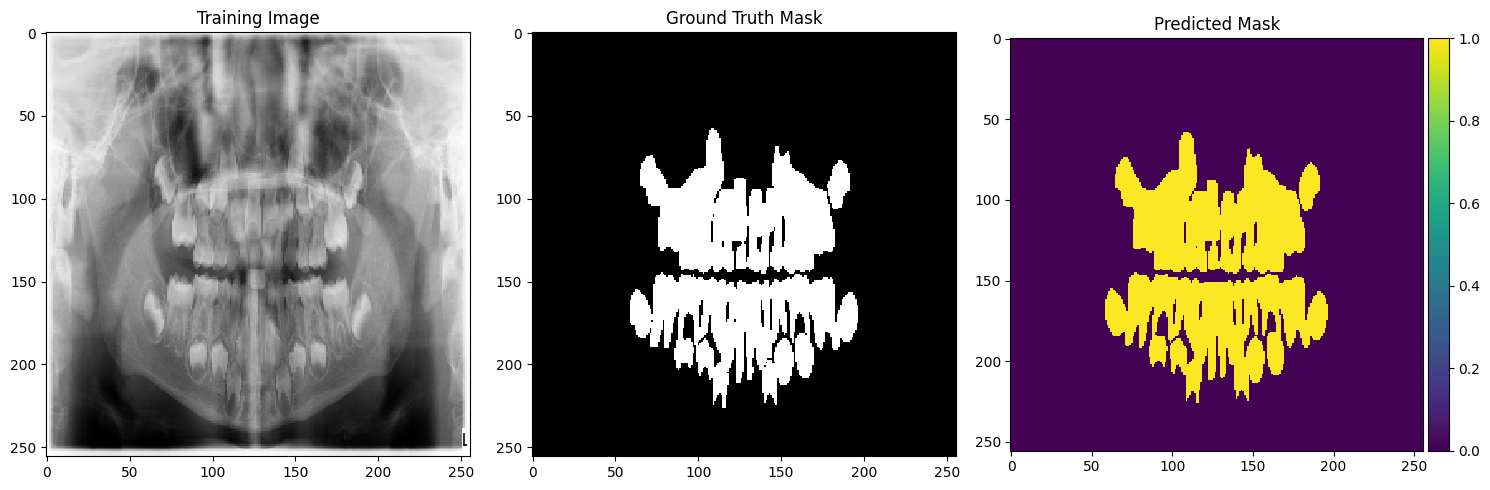

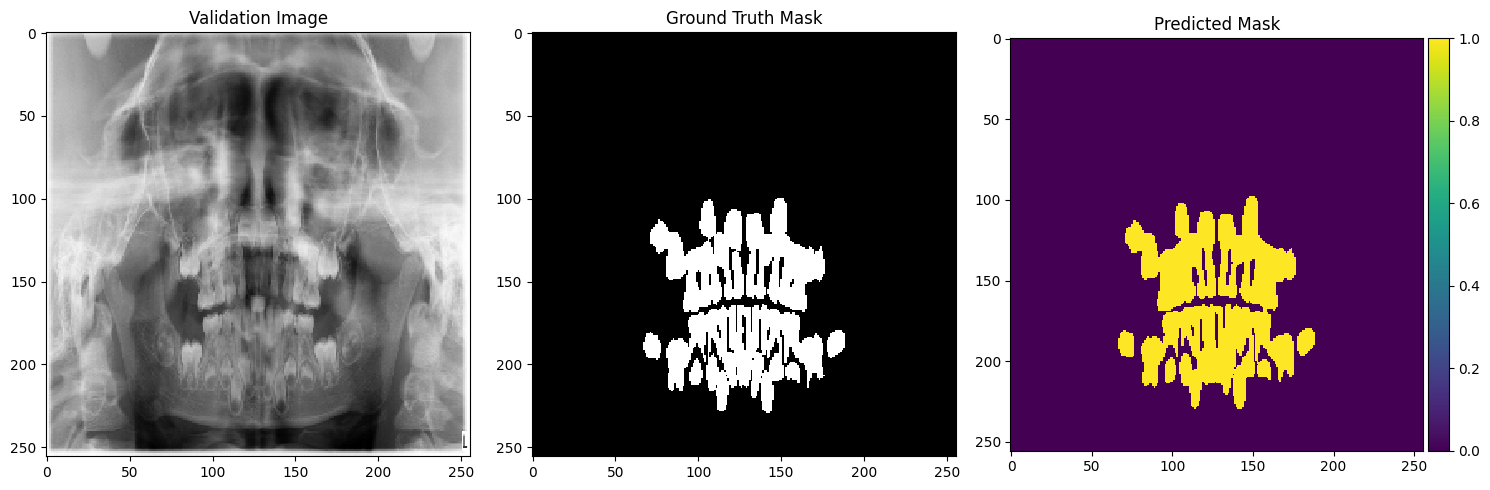

In [ ]:
import tensorflow as tf
import numpy as np
import random
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
model=model
idx = random.randint(0, len(x_test))

preds_train = model.predict(x_train[:int(x_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(x_train[int(x_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(x_test, verbose=1)

preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Training Image')
imshow(x_train[ix])

plt.subplot(1, 3, 2)
plt.title('Ground Truth Mask')
imshow(np.squeeze(y_train[ix]))


plt.subplot(1, 3, 3)
plt.title('Predicted Mask')
imshow(np.squeeze(preds_train_t[ix]))

plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Validation Image')
imshow(x_train[int(x_train.shape[0]*0.9):][ix])

plt.subplot(1, 3, 2)
plt.title('Ground Truth Mask')
imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix]))

plt.subplot(1, 3, 3)
plt.title('Predicted Mask')
imshow(np.squeeze(preds_val_t[ix]))
plt.show()

**Curves**

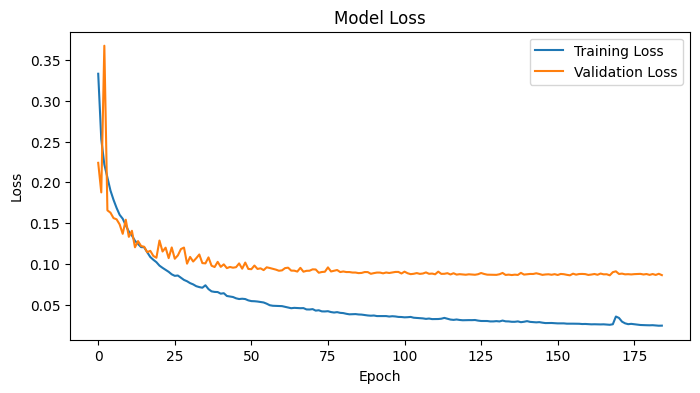

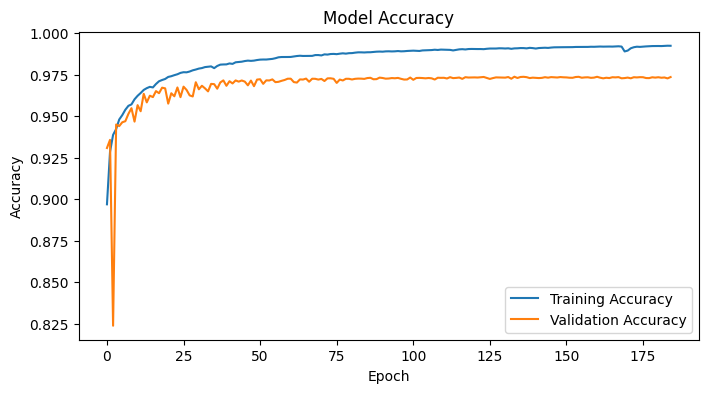

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
save_path = '/content/drive/MyDrive/Student/Ovi/Code/Models with TTS_AUG/EXPSegUnetCombine_Supplement_Supplemnt130_Child_TestSet_TrainSet_VGG19TTS.png'  # Adjust the path as needed
plt.savefig(save_path)

**Test Accuracy**

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, jaccard_score, confusion_matrix
import tensorflow as tf
score = model.evaluate(x_test, y_test, verbose=1)

# Print the test loss and accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])



3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.9753 - binary_io_u_1: 0.9146 - dice_coeff: 0.9249 - f1_score: 0.9252 - jaccard_index: 0.8608 - loss: 0.0765 - mae: 0.0246 - mean_iou: 0.8608 - precision: 0.9234 - recall: 0.9270 - specificity: 0.9850
Test loss: 0.07756357640028
Test accuracy: 0.9750403761863708


**Confusion Metrics**

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step


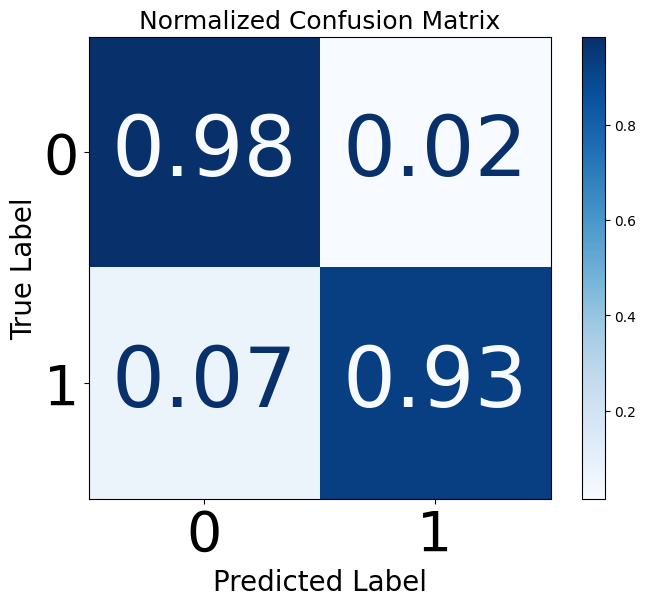

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Y_pred = model.predict(x_test)

Y_pred_binary = (Y_pred > 0.5).astype("int32")

# Flatten the arrays (for segmentation tasks)
Y_pred_flat = Y_pred_binary.flatten()
Y_test_flat = y_test.flatten()

# Generate the confusion matrix without normalization
conf_matrix = confusion_matrix(Y_test_flat, Y_pred_flat)

conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(8, 6))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized)
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format=".2f")

for text in disp.text_.ravel():
    text.set_fontsize(60)  # Adjust the font size of the annotations

ax.tick_params(axis='both', which='major', labelsize=40)

ax.set_xlabel('Predicted Label', fontsize=20)
ax.set_ylabel('True Label', fontsize=20)

# Adjust the title and show the plot
plt.title('Normalized Confusion Matrix', fontsize=18)
plt.savefig('/content/drive/MyDrive/Student/Ovi/Code/EXPconfusion metrics.png', bbox_inches='tight', dpi=300)
plt.show()
